In [1]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


## ClinicalBERT Embeddings

In [2]:
embeddings = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_ClinicalBERT_embeddings_30k.npy')
labels = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_ClinicalBERT_labels_30k.npy')


### Train/Dev/Test/Split

In [3]:
train_X, test_X, train_y, test_y = train_test_split(embeddings, labels, test_size=0.20, random_state=42)
del embeddings
del labels

In [4]:
train_X.shape

(24000, 264, 768)

In [5]:
test_X.shape

(6000, 264, 768)

## LSTM Models

### Stacked LSTMs (Best model from CORe experiments)

In [6]:
inputs = tf.keras.layers.Input(shape=(264,768))
LSTM1 = tf.keras.layers.LSTM(20, return_sequences=True)(inputs)
LSTM2 = tf.keras.layers.LSTM(20)(LSTM1)
classification_out = tf.keras.layers.Dense(4, activation='softmax')(LSTM2)

model = tf.keras.models.Model(inputs=inputs, outputs=classification_out)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer='adam', 
              metrics=['sparse_categorical_accuracy'])

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 264, 768)]        0         
                                                                 
 lstm (LSTM)                 (None, 264, 20)           63120     
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dense (Dense)               (None, 4)                 84        
                                                                 
Total params: 66,484
Trainable params: 66,484
Non-trainable params: 0
_________________________________________________________________


In [8]:
train = model.fit(train_X, train_y, epochs=7, validation_split=0.2)


Epoch 1/4
600/600 [==============================] - 124s 200ms/step - loss: 1.3658 - sparse_categorical_accuracy: 0.3086 - val_loss: 1.3501 - val_sparse_categorical_accuracy: 0.3354
Epoch 2/4
600/600 [==============================] - 100s 167ms/step - loss: 1.3322 - sparse_categorical_accuracy: 0.3416 - val_loss: 1.3409 - val_sparse_categorical_accuracy: 0.3458
Epoch 3/4
600/600 [==============================] - 102s 171ms/step - loss: 1.3136 - sparse_categorical_accuracy: 0.3587 - val_loss: 1.3235 - val_sparse_categorical_accuracy: 0.3469
Epoch 4/4
600/600 [==============================] - 101s 169ms/step - loss: 1.3039 - sparse_categorical_accuracy: 0.3701 - val_loss: 1.3249 - val_sparse_categorical_accuracy: 0.3569


In [9]:
model.evaluate(test_X, test_y)

188/188 [==============================] - 11s 54ms/step - loss: 1.3169 - sparse_categorical_accuracy: 0.3480


[1.316868782043457, 0.3479999899864197]

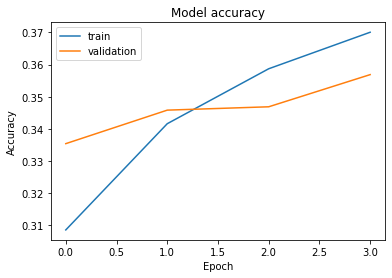

In [10]:
plt.plot(train.history['sparse_categorical_accuracy'])
plt.plot(train.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

---

In [6]:
inputs = tf.keras.layers.Input(shape=(264,768))
LSTM1 = tf.keras.layers.LSTM(20, return_sequences=True)(inputs)
LSTM2 = tf.keras.layers.LSTM(20)(LSTM1)
classification_out = tf.keras.layers.Dense(4, activation='softmax')(LSTM2)

model = tf.keras.models.Model(inputs=inputs, outputs=classification_out)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer='adam', 
              metrics=['sparse_categorical_accuracy'])

In [7]:
train = model.fit(train_X, train_y, epochs=10, validation_split=0.2)


Epoch 1/10
600/600 [==============================] - 114s 184ms/step - loss: 1.3679 - sparse_categorical_accuracy: 0.3024 - val_loss: 1.3557 - val_sparse_categorical_accuracy: 0.3300
Epoch 2/10
600/600 [==============================] - 107s 178ms/step - loss: 1.3407 - sparse_categorical_accuracy: 0.3345 - val_loss: 1.3340 - val_sparse_categorical_accuracy: 0.3535
Epoch 3/10
600/600 [==============================] - 102s 169ms/step - loss: 1.3189 - sparse_categorical_accuracy: 0.3565 - val_loss: 1.3287 - val_sparse_categorical_accuracy: 0.3390
Epoch 4/10
600/600 [==============================] - 101s 169ms/step - loss: 1.3089 - sparse_categorical_accuracy: 0.3597 - val_loss: 1.3203 - val_sparse_categorical_accuracy: 0.3577
Epoch 5/10
600/600 [==============================] - 101s 169ms/step - loss: 1.2989 - sparse_categorical_accuracy: 0.3734 - val_loss: 1.3189 - val_sparse_categorical_accuracy: 0.3702
Epoch 6/10
600/600 [==============================] - 105s 174ms/step - loss: 1.

In [8]:
model.evaluate(test_X, test_y)

188/188 [==============================] - 11s 55ms/step - loss: 1.3431 - sparse_categorical_accuracy: 0.3522


[1.3431475162506104, 0.35216665267944336]

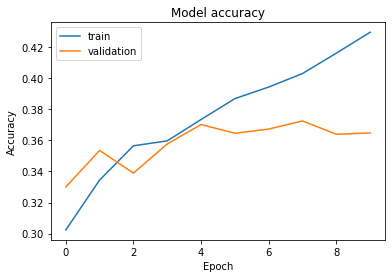

In [9]:
plt.plot(train.history['sparse_categorical_accuracy'])
plt.plot(train.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()